In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1. Visitation Data


In [5]:
visitation_df1 = pd.read_excel("Visitation Data Jul-Dec 2021.xlsx")

In [6]:
visitation_df1["Date_Time"] = pd.to_timedelta(visitation_df1["Time"].apply(lambda x: x.strftime(format="%H:%M:%S"))) + visitation_df1["Date"]

In [7]:
visitation_df1 = visitation_df1.drop_duplicates()

In [8]:
visitation_df1["Asset"].value_counts()

Baldivis       4392
Birtinya       4392
Bull Creek     4392
Burleigh       4392
Gladstone      4392
Harrisdale     4392
Hervey Bay     4392
Riverton       4392
Rockhampton    4392
Name: Asset, dtype: int64

In [9]:
visitation_df2 = pd.read_excel("Visitation Data Jan-June 2022.xlsx", sheet_name=["Asset Validation", "Data"])

In [10]:
asset_validation = visitation_df2["Asset Validation"]
visitation_df2 = visitation_df2["Data"]

In [11]:
asset_validation

,Asset,State,Post Code,Address
0,Baldivis,WA,6171,"20 Settlers Ave, Baldivis WA 6171"
1,Balgowlah,NSW,2093,"197-215 Condamine St, Balgowlah NSW 2093"
2,Birtinya,QLD,4575,"8 The Avenue, Birtinya QLD 4575"
3,Bull Creek,WA,6149,"South Street &, Benningfield Rd, Bull Creek WA..."
4,Burleigh,QLD,4220,"149 W Burleigh Rd, Burleigh Waters QLD 4220"
5,Gladstone,QLD,4680,"Dawson Hwy & Philip St, West Gladstone QLD 4680"
6,Glendale,NSW,2285,"387 Lake Rd, Glendale NSW 2285"
7,Green Hills,NSW,2323,"1 Molly Morgan Dr, East Maitland NSW 2323"
8,Harrisdale,WA,6112,"Corner Nicholson Rd & Yellowwood Ave, Harrisda..."
9,Hervey Bay,QLD,4655,"Stockland Hervey Bay, 6 Central Ave, Pialba QL..."


In [12]:
visitation_df2["Date_Time"] = pd.to_timedelta(visitation_df2["Time"].apply(lambda x: x.strftime(format="%H:%M:%S"))) + visitation_df2["Date"]

In [13]:
visitation_df2["Asset"].value_counts()

Baldivis          4344
Balgowlah         4344
Birtinya          4344
Bull Creek        4344
Burleigh          4344
Gladstone         4344
Glendale          4344
Green Hills       4344
Harrisdale        4344
Hervey Bay        4344
Merrylands        4344
Riverton          4344
Rockhampton       4344
Wendouree         4344
Wetherill Park    4344
Name: Asset, dtype: int64

In [14]:
visitation_df = pd.concat([visitation_df1, visitation_df2])

<AxesSubplot:>

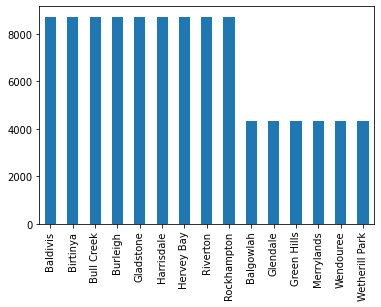

In [15]:
visitation_df["Asset"].value_counts().plot.bar()

### 2. Weather data

This section focuses on merging the data of weather and visitation in each city by using the following defined function. There are three cities that have available visitation data, including Rockhampton, Hervey Bay and Gladstone.

In [16]:
def merge_visitation_and_weather_data(visitation_df, weather_df):
    visitation_this_year = visitation_df.set_index("Date_Time")["Count This Year"].resample("D").sum()
    visitation_last_year = visitation_df.set_index("Date_Time")["Count Last Year"].resample("D").sum()

    weather_df["Date_Time"] = weather_df.apply(
        lambda row: pd.Timestamp(year=row["Year"], month=row["Month"], day=row["Day"]),
        axis=1,
    )
    weather_df = weather_df.query("'2021-07-02 00:00:00' <= Date_Time <= '2022-06-30 23:00:00'")
    rainfall_df = weather_df.set_index("Date_Time")["Rainfall amount (millimetres)"]

    return pd.concat(
        [
            visitation_last_year,
            visitation_this_year,
            rainfall_df,
        ], axis=1,
    )

#### 2.1: Rockhampton data

In [17]:
roackhampton_visitation_df = visitation_df.query("Asset == 'Rockhampton'")
roackhampton_weather_df = pd.read_excel("Weather Data (raw)/Roackhampton.xlsx", header=[1])

roackhampton_data = merge_visitation_and_weather_data(roackhampton_visitation_df, roackhampton_weather_df)

#### 2.2: Hervey Bay data

In [18]:
hervey_bay_visitation_df = visitation_df.query("Asset == 'Hervey Bay'")
hervey_bay_weather_df = pd.read_excel("Weather Data (raw)/Hervey Bay Airport.xlsx", header=[1])

hervey_bay_data = merge_visitation_and_weather_data(hervey_bay_visitation_df, hervey_bay_weather_df)

#### 2.3: Gladstone data

In [19]:
gladstone_visitation_df = visitation_df.query("Asset == 'Gladstone'")
gladstone_weather_df = pd.read_csv("Weather Data (raw)/Gladstone Airport_IDCJAC0009_039326_1800_Data.csv")

gladstone_data = merge_visitation_and_weather_data(gladstone_visitation_df, gladstone_weather_df)

### 3. Merging data of three separated data by city

In [20]:
data = pd.concat(
    [
        roackhampton_data,
        hervey_bay_data,
        gladstone_data,
    ],
    keys=[
        "roackhampton",
        "hervey_bay",
        "gladstone",
    ]
).rename_axis(("City", "Date_Time")).reset_index().fillna(0)

In [21]:
data

,City,Date_Time,Count Last Year,Count This Year,Rainfall amount (millimetres)
0,roackhampton,2021-07-02,20213.0,21361.0,2.0
1,roackhampton,2021-07-03,17586.0,20903.0,24.2
2,roackhampton,2021-07-04,12338.0,13409.0,0.0
3,roackhampton,2021-07-05,17264.0,17767.0,3.2
4,roackhampton,2021-07-06,17636.0,18117.0,0.0
...,...,...,...,...,...
1087,gladstone,2022-06-26,10568.0,9702.0,0.0
1088,gladstone,2022-06-27,11812.0,11541.0,0.0
1089,gladstone,2022-06-28,12696.0,12822.0,0.0
1090,gladstone,2022-06-29,12127.0,12752.0,0.0


### 4. Distribution of number of visitation per day in each city

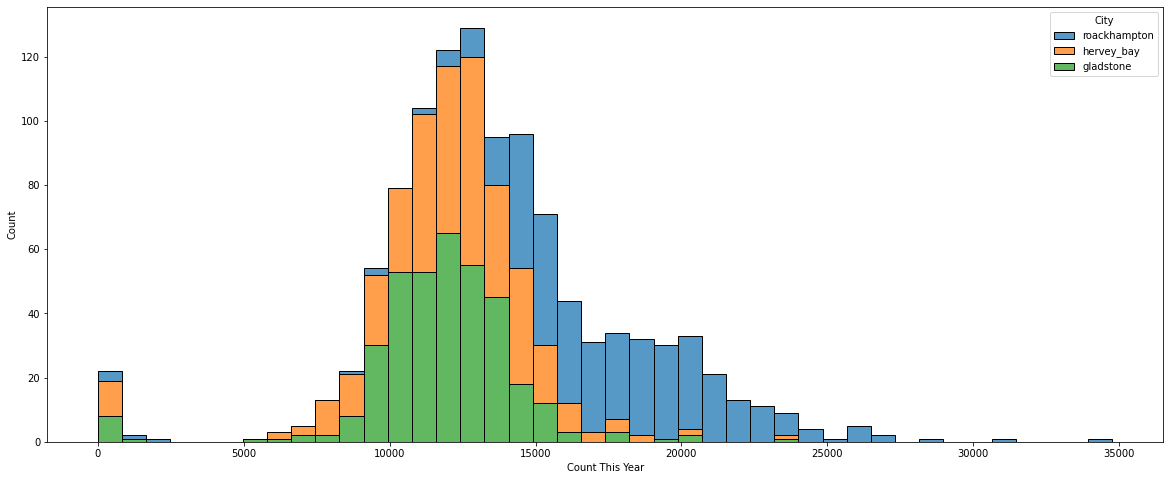

In [22]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(
    data=data,
    x="Count This Year",
    hue="City",
    multiple="stack",
    ax=ax,
);

The above histogram shows the distribution of the daily visitation number from 07/2021 until 06/2022 in all three cities, including Rockhampton (Blue), Hervey Bay (Orange) and Gladstone (Green).

As can be seen, Rockhampton appears to be the favourite destination with a much higher visitation number of clients in comparison to the other cities. This is reflected through the highest frequency ranging from 10,000 to 20,000, while the other cities show lower concentration peaks with a narrower range (from 10,000 to 15,000). 

Furthermore, the below line graph shows the evolution of daily visitation numbers over the whole period (from July 2021 to June 2022), which exhibits the surpass of Rockhampton's visitation frequency over the other cities in nearly the entire year.

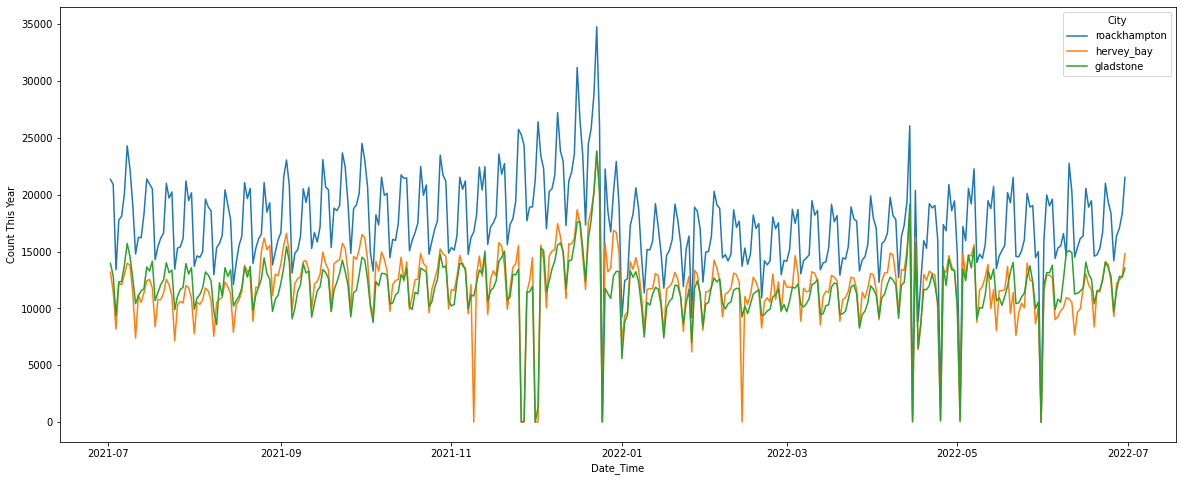

In [23]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(
    data=data,
    x="Date_Time",
    y="Count This Year",
    hue="City",
    ax=ax,
);

The series of daily visitation in all three stores in 3 cities appears to be seasonal, with the increasing tendency of shopping from the beginning to the end of the month. Furthermore, the overall pattern shows that both Rockhampton and Hervey Bay experienced a growing movement from mid to end of the year (notably, at Christmas), then decreased and rose back in mid-2022.

The peak of the visitation number per day in Rockhampton is found on Christmas and New Year holidays, with a peak of nearly 35000 visits per day. On the contrary, in the same period, Gladstone witnessed a sharp crash in visitation as this store closed on these days.

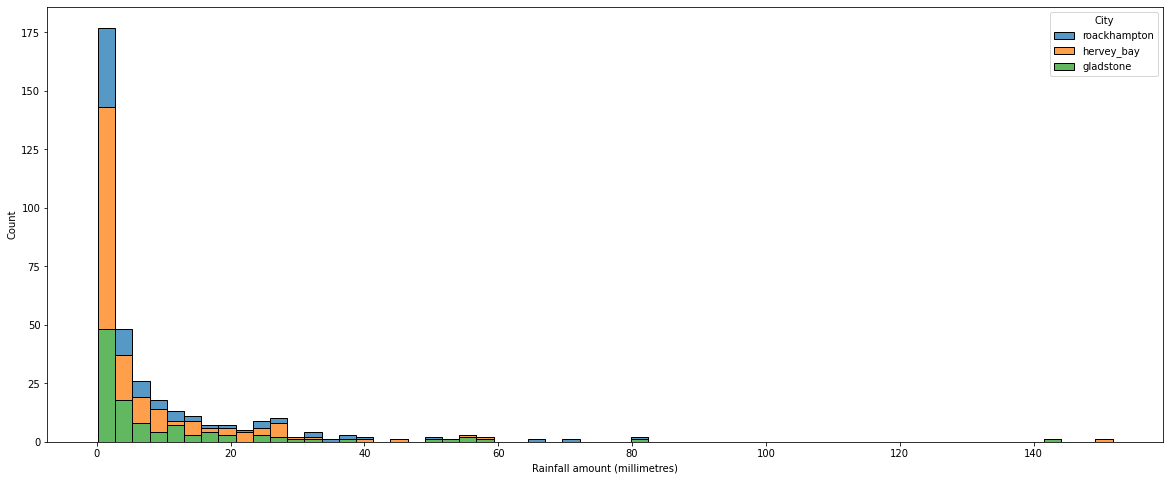

In [24]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.histplot(
    data=data.query("`Rainfall amount (millimetres)` > 0"),
    x="Rainfall amount (millimetres)",
    hue="City",
    multiple="stack",
    ax=ax,
);

The graph above shows the distribution of rainfall amount in all three cities. As can be seen, Rockhampton has the highest average rainfall amount in the year, followed by Hervey Bay and Gladstone. However, both Hervey Bay and Gladstone had exceptionally high rainfall amount on several days a year, reflected through the long thin right tail of the distribution.

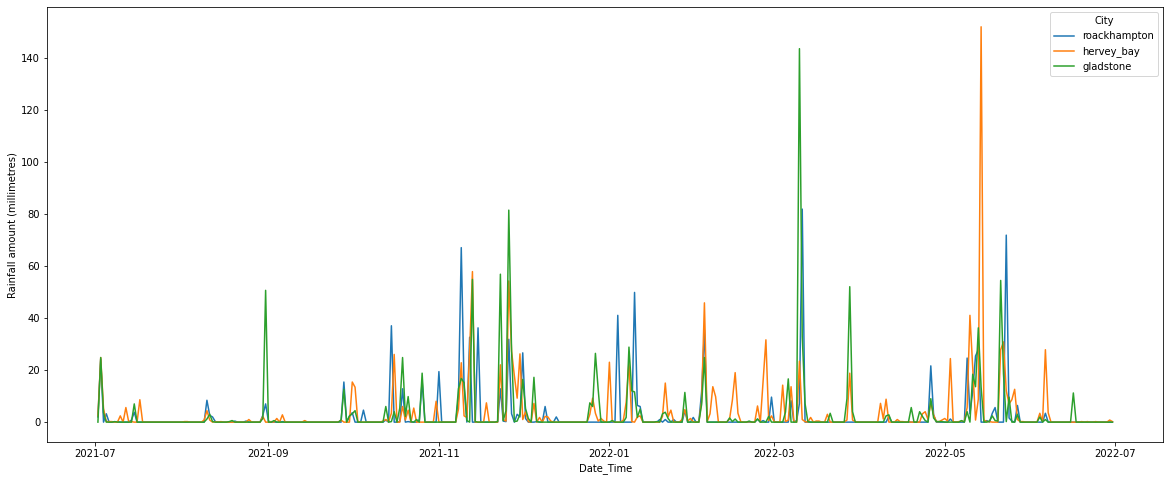

In [25]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(
    data=data,
    x="Date_Time",
    y="Rainfall amount (millimetres)",
    hue="City",
    ax=ax,
);

The above graph shows the rainfall amounts in all three cities from 07/2021 to 06/2022. As can be seen, the last quarter of the year appears to be the wet season in all three cities with highly concentrated high rainfall amounts. However, previous March (2022), Gladstone experienced a much higher rainfall, while Hervey witnessed a peak of more than 140mm in early June 2022.

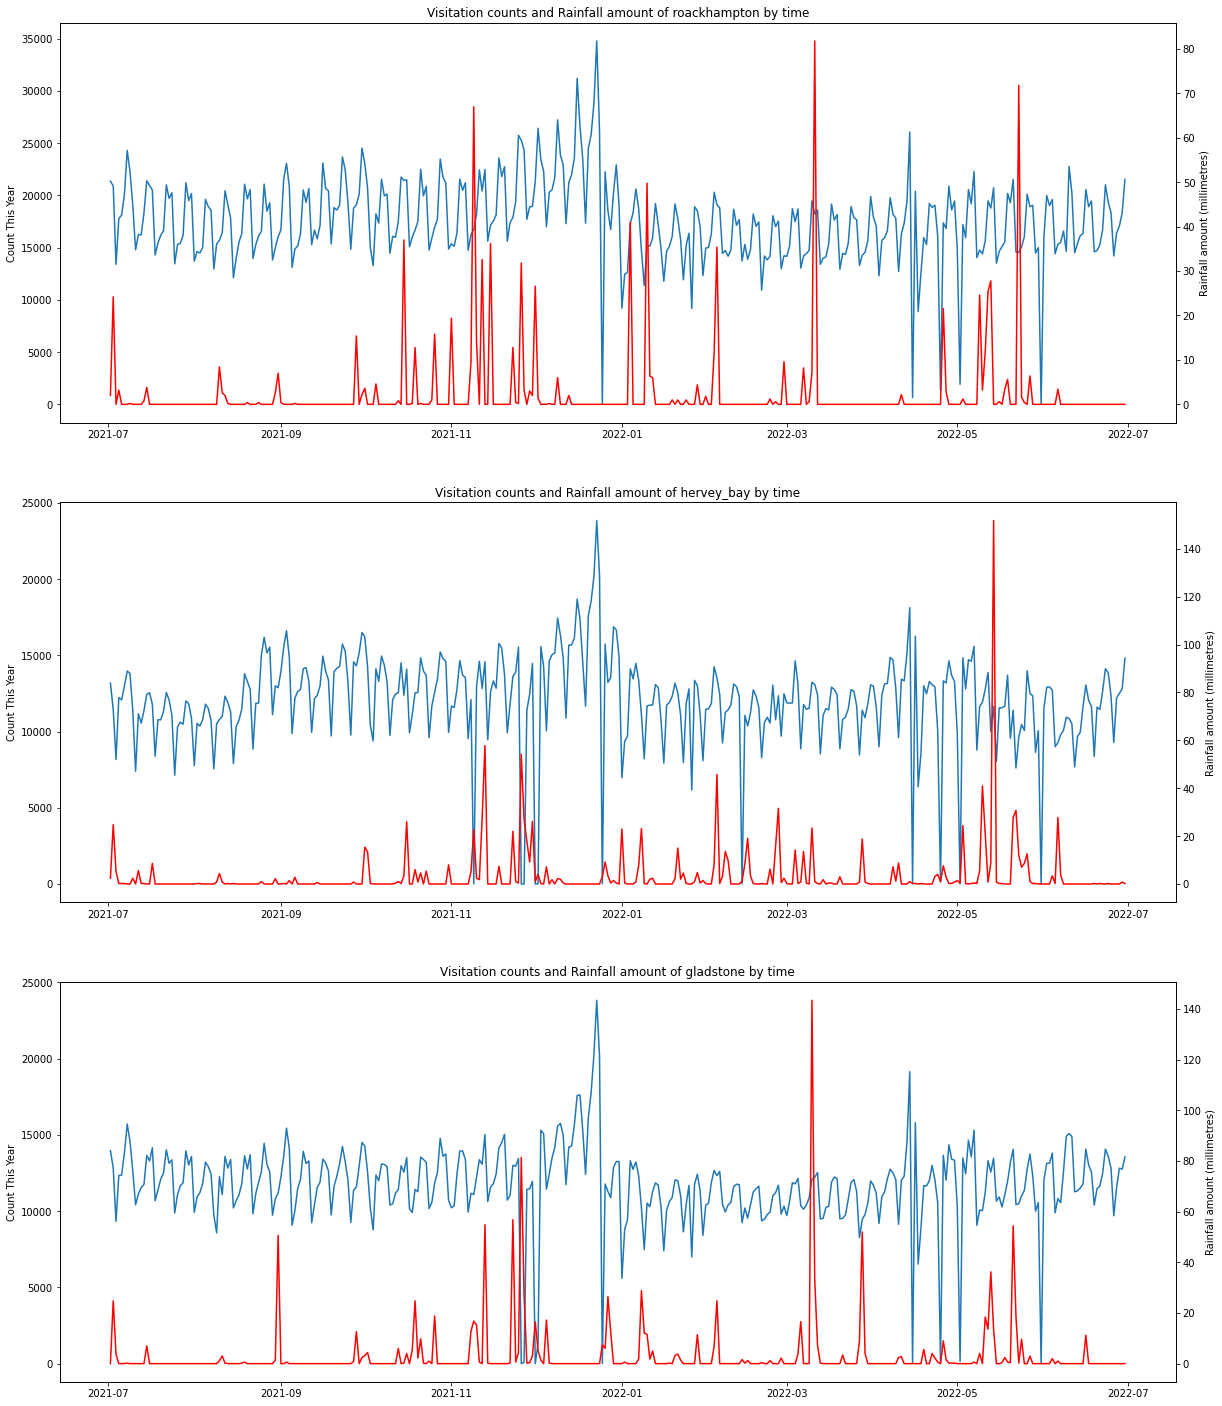

In [26]:
fig, ax = plt.subplots(nrows=3, figsize=(20, 25))
for k, city in enumerate(data["City"].unique()):
    data_city = data.query(f"City == '{city}'")
    ax[k].plot(data_city["Date_Time"], data_city["Count This Year"])
    ax[k].set_ylabel("Count This Year")
    ax2 = ax[k].twinx()
    ax2.plot(data_city["Date_Time"], data_city["Rainfall amount (millimetres)"], color="red")
    ax2.set_ylabel("Rainfall amount (millimetres)")
    ax2.set_title(f"Visitation counts and Rainfall amount of {city} by time")

The above graph compares and contrasts the level of rainfall amount and the number of visits to stores in all three cities. As can be seen, during the peak period of sales (in the last quarter of 2021), the day with a high level of rain seems to have a lower number of visitation days. This implies the negative relationship between rainfall amount and daily visitation number in all three cities. However, in other periods during the years, this correlation is not so clear.

In addition, the following scatter plot illustrates the relationship between rainfall amount and the number of visits. As can be seen, there is no clear pattern between rainfall amount and the number of visitations as the scatter points are concentrated at the 0mm rainfall and the number of visitations from 10000 to 15000.

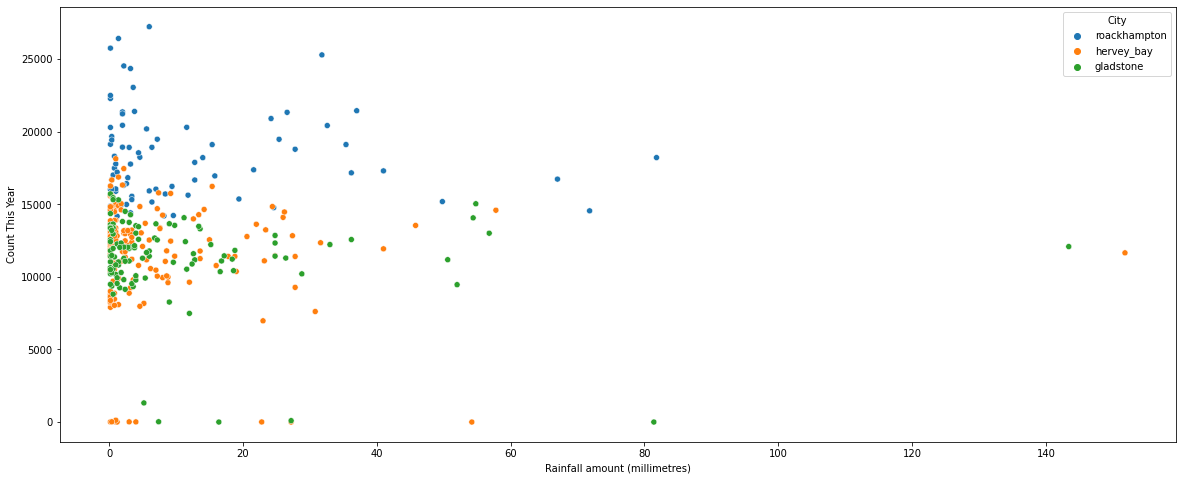

In [27]:
fig, ax = plt.subplots(figsize=(20, 8))
sns.scatterplot(
    data=data.query("`Rainfall amount (millimetres)` > 0"),
    x="Rainfall amount (millimetres)",
    y="Count This Year",
    hue="City",
    ax=ax,
);

### 5. Heavy rain and Consistent rain

In this section, the correlation between rainfall amount and the number of visits is analysed by employing two created dummy variables, including heavy rain and consistent rain in the following definitions:

- Heavy rain refers to a day with a higher rainfall amount than the average yearly rainfall.
- Consistent rain refers to a day in the range of 2 weeks (14 days) with at least 10 rainy days.

In [28]:
rainfall_amount_mean = data.query("`Rainfall amount (millimetres)` > 0")["Rainfall amount (millimetres)"].mean()

In [29]:
rainfall_amount_mean

9.256983240223464

In [30]:
data["is_heavy_raining"] = data["Rainfall amount (millimetres)"] > rainfall_amount_mean

In [31]:
data["is_raining"] = data["Rainfall amount (millimetres)"] > 0

In [32]:
data_by_heavy_raining = data.groupby(["City", "is_heavy_raining"], as_index=False)["Count This Year"].mean()

In [33]:
data_by_heavy_raining

,City,is_heavy_raining,Count This Year
0,gladstone,False,11825.112121
1,gladstone,True,10761.470588
2,hervey_bay,False,12068.581818
3,hervey_bay,True,11102.617647
4,roackhampton,False,17551.494083
5,roackhampton,True,18022.346154


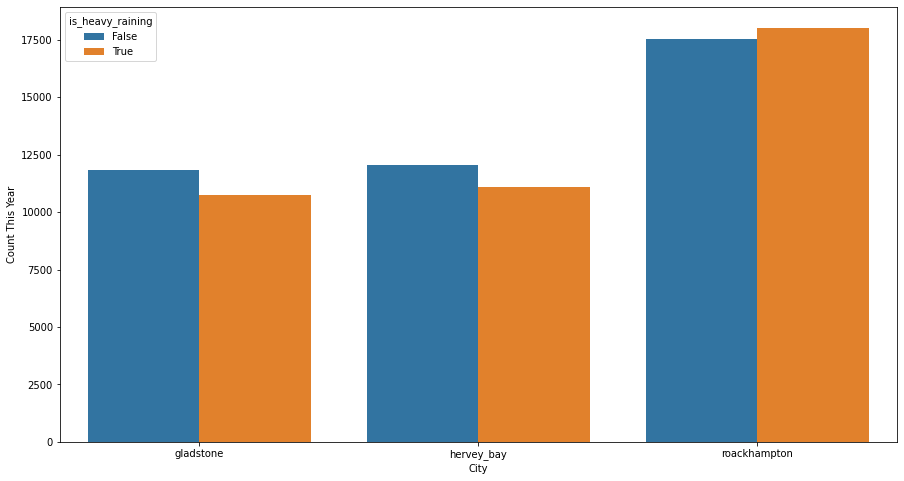

In [34]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(
    data=data_by_heavy_raining,
    x="City",
    y="Count This Year",
    hue="is_heavy_raining",
    ax=ax,
);

The unstacked bar chart above shows the difference in visitation numbers by two types of day based on rainfall in all three cities.

As can be seen, Gladstone and Hervey Bay witnessed a lower level of daily visitation on heavy rainy days than on the other days. On the contrary, heavy rainy weather boosts the number of visitations among customers.

In [35]:
consistent_raining = pd.concat([
    data.query(f"City == '{city}'").set_index(
        "Date_Time"
    )["is_raining"].rolling(14, min_periods=14).apply(lambda x: x.sum() > 10)
    for city in data["City"].unique()
]).rename("is_consistent_raining")

In [ ]:
data = pd.concat([data.set_index("Date_Time"), consistent_raining], axis=1).reset_index()

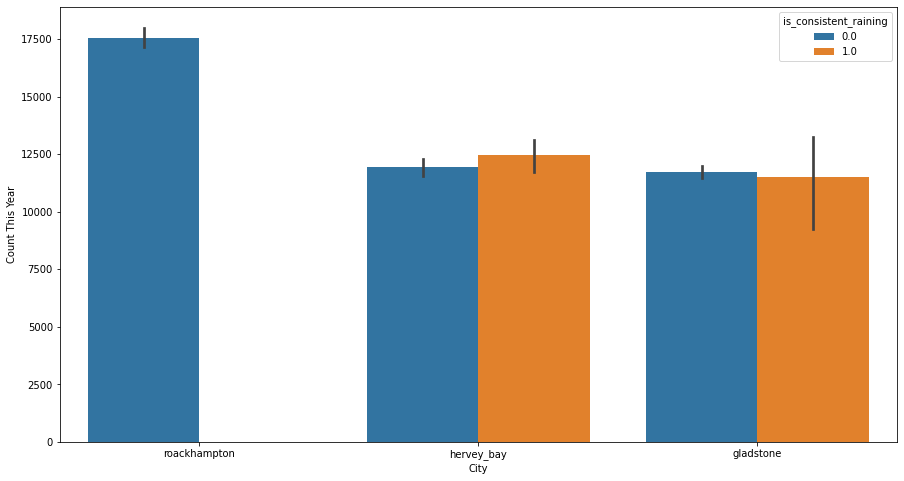

In [37]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(
    data=data,
    x="City",
    y="Count This Year",
    hue="is_consistent_raining",
    ax=ax,
);

Furthermore, it's clear that Rockhampton has no period with consecutive 14 rainy days, while both Hervey Bay and Gladstone have more extended rainy periods, leading to lower levels of daily visitation.